### Module Import

In [1]:
from pycaret import *

In [2]:
from pycaret.classification import *
import pycaret.classification as pycc

In [3]:
import pandas as pd
# import scikit-learn as sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection

%matplotlib inline

In [4]:
%cd D:/wildfire project

D:\wildfire project


In [5]:
os.listdir()

['.ipynb_checkpoints',
 'blend_model_knn_lr_rfbag.pkl',
 'Excel formats',
 'Feature engineering.ipynb',
 'Final Presentation',
 'Fire weather fia merge.ipynb',
 'fire1992_merged.csv',
 'fire1993_merged.csv',
 'fire1994_merged.csv',
 'fire1995_merged.csv',
 'fire1996_merged.csv',
 'fire1997_merged.csv',
 'fire1998_merged.csv',
 'fire1999_merged.csv',
 'fire2000_merged.csv',
 'fire2001_merged.csv',
 'fire2002_merged.csv',
 'fire2003_merged.csv',
 'fire2004_merged.csv',
 'fire2005_merged.csv',
 'fire2006_merged.csv',
 'fire2007_merged.csv',
 'fire2008_merged.csv',
 'fire2009_merged.csv',
 'fire2010_merged.csv',
 'fire2011_merged.csv',
 'fire2012_merged.csv',
 'fire2013_merged.csv',
 'fire2014_merged.csv',
 'fire2015_merged.csv',
 'logs.log',
 'merged file transformation',
 'merged_duration.csv',
 'Merged_dur_firestations.csv',
 'Pycaret classification.ipynb',
 'requred column from FIA.xlsx',
 'saved_blended_model.pkl',
 'sustainability-14-10107-v2 (2).pdf',
 'tuned_knn.pkl',
 'tuned_lr.pk

In [6]:
df = pd.concat(map(pd.read_csv, [ 'fire1992_merged.csv',
 'fire1993_merged.csv',
 'fire1994_merged.csv',
 'fire1995_merged.csv',
 'fire1997_merged.csv',
 'fire1999_merged.csv',
 'fire1998_merged.csv',
 'fire2000_merged.csv',
 'fire2002_merged.csv',
 'fire2003_merged.csv',
 'fire2004_merged.csv',
 'fire1996_merged.csv',
 'fire2005_merged.csv',
 'fire2007_merged.csv',
 'fire2010_merged.csv',
 'fire2006_merged.csv',
 'fire2009_merged.csv',
 'fire2008_merged.csv',
 'fire2012_merged.csv',
 'fire2011_merged.csv',
 'fire2014_merged.csv',
 'fire2013_merged.csv',
 'fire2015_merged.csv']))

### Basic Analysis and Cleaning

In [7]:
df["FIRE_SIZE_CLASS"].value_counts()

B    91339
C    25284
A    18073
D     3760
E     1770
F      789
G      235
Name: FIRE_SIZE_CLASS, dtype: int64

In [8]:
df=df.reset_index()

In [9]:
df["New_Fire_size_class"]=df["FIRE_SIZE_CLASS"]
for i,v in df.iterrows():
    if (df["New_Fire_size_class"][i]=="F" or df["New_Fire_size_class"][i]=="G"):
        df["New_Fire_size_class"][i]="FG"

In [10]:
df.New_Fire_size_class.value_counts()

B     91339
C     25284
A     18073
D      3760
E      1770
FG     1024
Name: New_Fire_size_class, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141250 entries, 0 to 141249
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                141250 non-null  int64  
 1   Unnamed: 0.1         141250 non-null  int64  
 2   Unnamed: 0           141250 non-null  int64  
 3   FOD_ID               141250 non-null  int64  
 4   FPA_ID               141250 non-null  object 
 5   FIRE_NAME            81793 non-null   object 
 6   FIRE_YEAR            141250 non-null  int64  
 7   DISCOVERY_DOY        141250 non-null  int64  
 8   DISCOVERY_TIME       141250 non-null  int64  
 9   STAT_CAUSE_CODE      141250 non-null  float64
 10  STAT_CAUSE_DESCR     141250 non-null  object 
 11  CONT_DOY             141250 non-null  int64  
 12  CONT_TIME            141250 non-null  int64  
 13  FIRE_SIZE            141250 non-null  float64
 14  FIRE_SIZE_CLASS      141250 non-null  object 
 15  LATITUDE         

In [12]:
df.head()

,index,Unnamed: 0.1,Unnamed: 0,FOD_ID,FPA_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,d_month,d_day,d_hour,d_min,c_month,c_day,c_hour,c_min,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FeltTemp_start,New_Fire_size_class
0,0,0,52738,53173,FS-276639,NaN,1992,99,1305,7.0,Arson,99,1440,10.0,C,31.071667,-94.221667,TX,4,9,13,5,4,9,14,40,77.080864,62.354927,52.192808,10.306146,77.080864,C
1,1,1,52739,53174,FS-276641,NaN,1992,133,1400,7.0,Arson,133,1900,151.0,D,31.068333,-94.151667,TX,5,13,14,0,5,13,19,0,87.979259,72.273413,51.371132,11.006068,87.979259,D
2,2,2,52740,53175,FS-276642,NaN,1992,171,1830,7.0,Arson,172,200,15.0,C,31.055000,-94.371667,TX,6,20,18,30,6,21,2,0,91.937453,74.402587,48.549445,11.629194,91.937453,C
3,3,3,52741,53176,FS-276644,NaN,1992,214,1330,7.0,Arson,214,1745,23.0,C,31.076667,-94.158333,TX,8,2,13,30,8,2,17,45,89.245916,73.975209,53.836260,12.505792,89.245916,C
4,4,4,52742,53177,FS-276646,NaN,1992,244,815,7.0,Arson,244,1130,204.5,D,31.125000,-94.108333,TX,9,2,8,15,9,2,11,30,93.795612,74.671379,43.929501,14.549308,93.795612,D


In [13]:
# q = df["FIRE_SIZE"].quantile(0.9999)
# df = df[df["FIRE_SIZE"] < q]

In [14]:
df["FIRE_SIZE"].max()

479549.0

In [15]:
model_df_merged_class = df[['d_month','temp_start','dewPointTemp_start','RelHumidity_start','Windspeed_start','New_Fire_size_class']]

In [16]:
model_df_merged_class.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,New_Fire_size_class
0,4,77.080864,62.354927,52.192808,10.306146,C
1,5,87.979259,72.273413,51.371132,11.006068,D
2,6,91.937453,74.402587,48.549445,11.629194,C
3,8,89.245916,73.975209,53.836260,12.505792,C
4,9,93.795612,74.671379,43.929501,14.549308,D


In [17]:
model_df_merged_class.describe()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start
count,141250.000000,139730.000000,139730.000000,139730.000000,139730.000000
mean,5.873083,81.910376,56.590497,31.581697,14.509208
std,3.406109,14.058934,15.372075,12.692429,4.633842
min,1.000000,17.818786,-0.134739,0.847965,0.062178
25%,3.000000,71.787622,45.103809,22.246349,11.180841
50%,6.000000,82.934793,60.802706,30.210050,13.817603
75%,9.000000,94.013046,69.736037,39.514147,17.081894
max,12.000000,126.803348,90.786811,99.754396,113.828866


In [18]:
model_df_merged_class = model_df_merged_class.dropna()

In [19]:
from sklearn import preprocessing
model_df_merged_class.iloc[:,1:5] = preprocessing.normalize(model_df_merged_class.iloc[:,1:5])

In [20]:
model_df_merged_class.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,New_Fire_size_class
0,4,0.685064,0.554186,0.463869,0.091597,C
1,5,0.701617,0.576366,0.409674,0.087771,D
2,6,0.716155,0.579565,0.378180,0.090587,C
3,8,0.694949,0.576038,0.419218,0.097381,C
4,9,0.729868,0.581053,0.341836,0.113215,D


In [21]:
model_df_merged_class['Label_temp'] = pd.cut(x=model_df_merged_class['temp_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_merged_class['Label_dew'] = pd.cut(x=model_df_merged_class['dewPointTemp_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_merged_class['Label_hum'] = pd.cut(x=model_df_merged_class['RelHumidity_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_merged_class['Label_ws'] = pd.cut(x=model_df_merged_class['Windspeed_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])

In [22]:
model_df_merged_class.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,New_Fire_size_class,Label_temp,Label_dew,Label_hum,Label_ws
0,4,0.685064,0.554186,0.463869,0.091597,C,h,h,l,vl
1,5,0.701617,0.576366,0.409674,0.087771,D,h,h,l,vl
2,6,0.716155,0.579565,0.378180,0.090587,C,h,h,l,vl
3,8,0.694949,0.576038,0.419218,0.097381,C,h,h,l,vl
4,9,0.729868,0.581053,0.341836,0.113215,D,h,h,l,vl


In [23]:
model_df_merged_class = model_df_merged_class.drop(['temp_start','dewPointTemp_start','RelHumidity_start','Windspeed_start'], axis=1)

In [24]:
model_df_merged_class.head()

,d_month,New_Fire_size_class,Label_temp,Label_dew,Label_hum,Label_ws
0,4,C,h,h,l,vl
1,5,D,h,h,l,vl
2,6,C,h,h,l,vl
3,8,C,h,h,l,vl
4,9,D,h,h,l,vl


In [25]:
model_df_merged_class = model_df_merged_class.dropna()

In [26]:
le = LabelEncoder()
model_df_merged_class["Label_temp"] = le.fit_transform(model_df_merged_class["Label_temp"])
model_df_merged_class["Label_dew"] = le.fit_transform(model_df_merged_class["Label_dew"])
model_df_merged_class["Label_hum"] = le.fit_transform(model_df_merged_class["Label_hum"])
model_df_merged_class["Label_ws"] = le.fit_transform(model_df_merged_class["Label_ws"])
model_df_merged_class["New_Fire_size_class"] = le.fit_transform(model_df_merged_class["New_Fire_size_class"])


In [27]:
model_df_merged_class.head()

,d_month,New_Fire_size_class,Label_temp,Label_dew,Label_hum,Label_ws
0,4,2,0,0,1,2
1,5,3,0,0,1,2
2,6,2,0,0,1,2
3,8,2,0,0,1,2
4,9,3,0,0,1,2


In [28]:
clf_merged_class = setup(data=model_df_merged_class, target='New_Fire_size_class', categorical_features = ['d_month','Label_temp','Label_dew','Label_hum','Label_ws'], fix_imbalance = True, n_jobs=1)

,Description,Value
0,session_id,3360
1,Target,New_Fire_size_class
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(139729, 6)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
cv_strat = StratifiedKFold(n_splits=5, random_state=123)

In [31]:
rf_clf_merged = pycc.create_model('rf', fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2129,0.5448,0.2430,0.4933,0.2634,0.0226,0.0276
1,0.2225,0.5346,0.2297,0.4852,0.2722,0.0211,0.0257
2,0.2343,0.5363,0.2257,0.4924,0.2897,0.0248,0.0296
3,0.2074,0.5401,0.2265,0.4940,0.2554,0.0233,0.0287
4,0.2388,0.5393,0.2391,0.4913,0.2955,0.0280,0.0331
Mean,0.2232,0.5390,0.2328,0.4913,0.2753,0.0239,0.0289
Std,0.0120,0.0035,0.0070,0.0032,0.0153,0.0023,0.0025


In [32]:
tuned_rf_clf_merged = tune_model(rf_clf_merged, optimize='Prec.',fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2937,0.5422,0.2470,0.4946,0.3555,0.0320,0.0364
1,0.3276,0.5375,0.2405,0.4948,0.3820,0.0326,0.0361
2,0.3018,0.5392,0.2316,0.4935,0.3628,0.0310,0.0347
3,0.3027,0.5401,0.2413,0.4962,0.3657,0.0340,0.0381
4,0.3318,0.5387,0.2636,0.4948,0.3878,0.0371,0.0411
Mean,0.3115,0.5396,0.2448,0.4948,0.3708,0.0333,0.0373
Std,0.0152,0.0016,0.0106,0.0009,0.0122,0.0021,0.0022


In [42]:
# rf_bag_pred= pycc.ensemble_model(rf_clf_merged,method="Boosting",fold=5,n_estimators=270)

### LR

In [34]:
lr_clf_merged = pycc.create_model('lr', fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2298,0.5442,0.2458,0.4952,0.2881,0.0244,0.0302
1,0.2614,0.5379,0.2372,0.4927,0.3191,0.0285,0.0334
2,0.2272,0.5385,0.2276,0.4965,0.2809,0.0262,0.0318
3,0.2161,0.5410,0.2371,0.4915,0.2714,0.0199,0.0246
4,0.2404,0.5392,0.2609,0.4900,0.2961,0.0277,0.0334
Mean,0.2350,0.5402,0.2417,0.4932,0.2911,0.0253,0.0307
Std,0.0153,0.0023,0.0112,0.0024,0.0162,0.0031,0.0033


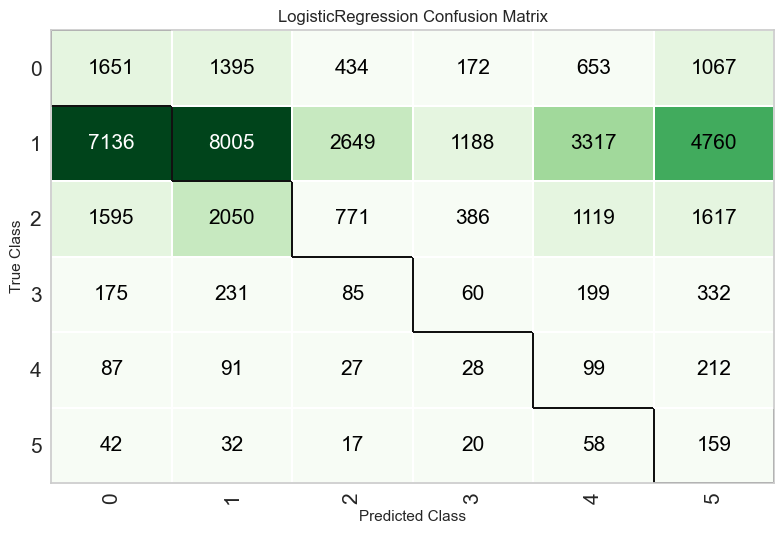

In [63]:
plot_model(lr_clf_merged, plot="confusion_matrix")

In [35]:
tuned_merged_lr = tune_model(lr_clf_merged, optimize='Prec.',fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2299,0.5442,0.2459,0.4953,0.2882,0.0245,0.0303
1,0.2614,0.5379,0.2372,0.4927,0.3191,0.0285,0.0334
2,0.2272,0.5384,0.2276,0.4965,0.2809,0.0262,0.0318
3,0.2161,0.5410,0.2371,0.4915,0.2714,0.0199,0.0246
4,0.2404,0.5391,0.2609,0.4900,0.2961,0.0277,0.0334
Mean,0.2350,0.5401,0.2417,0.4932,0.2912,0.0253,0.0307
Std,0.0153,0.0023,0.0112,0.0024,0.0162,0.0031,0.0033


In [40]:
tuned_merged_lr_Recall = tune_model(lr_clf_merged, optimize='Recall',fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2299,0.5442,0.2459,0.4953,0.2882,0.0245,0.0303
1,0.2614,0.5379,0.2372,0.4927,0.3191,0.0285,0.0334
2,0.2272,0.5384,0.2276,0.4965,0.2809,0.0262,0.0318
3,0.2161,0.5410,0.2371,0.4915,0.2714,0.0199,0.0246
4,0.2404,0.5391,0.2609,0.4900,0.2961,0.0277,0.0334
Mean,0.2350,0.5401,0.2417,0.4932,0.2912,0.0253,0.0307
Std,0.0153,0.0023,0.0112,0.0024,0.0162,0.0031,0.0033


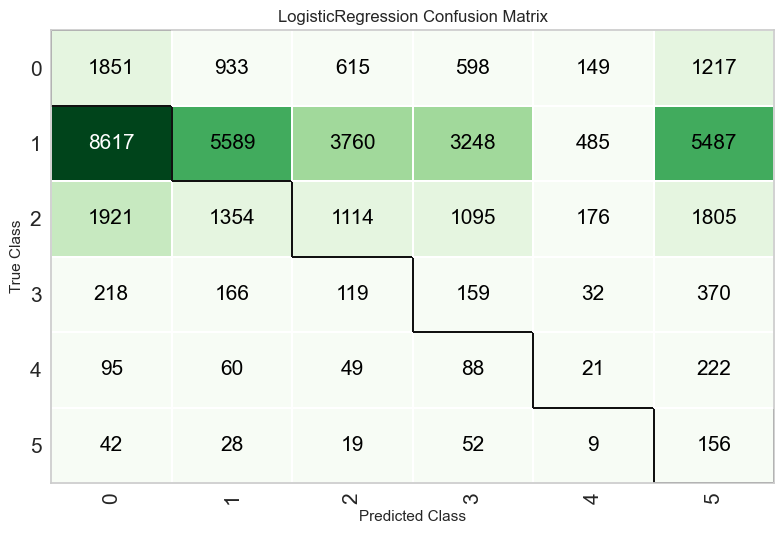

In [41]:
plot_model(tuned_merged_lr_Recall, plot="confusion_matrix")

In [65]:
# rf_clf_merged = pycc.create_model('rf', fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2865,0.5352,0.2330,0.4900,0.3445,0.0276,0.0313
1,0.2601,0.5394,0.2330,0.4982,0.3234,0.0284,0.0331
2,0.2451,0.5440,0.2495,0.4992,0.2965,0.0315,0.0377
3,0.2346,0.5379,0.2412,0.4952,0.2817,0.0266,0.0321
4,0.2701,0.5374,0.2359,0.4949,0.3311,0.0285,0.0329
Mean,0.2593,0.5388,0.2385,0.4955,0.3154,0.0285,0.0334
Std,0.0183,0.0030,0.0063,0.0032,0.0230,0.0017,0.0022


In [66]:
# tuned_rf_clf_merged = tune_model(rf_clf_merged, optimize='Prec.',fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2632,0.5313,0.2354,0.4935,0.3135,0.0246,0.0294
1,0.3661,0.5334,0.2273,0.4976,0.4169,0.0351,0.0378
2,0.2718,0.5399,0.2490,0.4984,0.3324,0.0303,0.0350
3,0.3713,0.5339,0.2395,0.4928,0.4183,0.0356,0.0382
4,0.3671,0.5355,0.2438,0.4987,0.4143,0.0388,0.0419
Mean,0.3279,0.5348,0.2390,0.4962,0.3791,0.0329,0.0365
Std,0.0494,0.0029,0.0074,0.0025,0.0462,0.0049,0.0042


In [67]:
# svm_clf_merged = pycc.create_model('svm', fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2721,0.0000,0.1968,0.4801,0.3386,0.0123,0.0139
1,0.2152,0.0000,0.2204,0.4880,0.2856,0.0157,0.0213
2,0.4442,0.0000,0.2298,0.5011,0.4548,0.0417,0.0462
3,0.4283,0.0000,0.2298,0.4631,0.4351,0.0322,0.0366
4,0.5556,0.0000,0.2120,0.4790,0.4817,0.0230,0.0270
Mean,0.3831,0.0000,0.2178,0.4822,0.3991,0.0250,0.0290
Std,0.1233,0.0000,0.0124,0.0124,0.0745,0.0108,0.0114


In [68]:
# tuned_svm_clf_merged = tune_model(svm_clf_merged, optimize='Prec.',fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3057,0.0000,0.2219,0.5032,0.3609,0.0215,0.0250
1,0.0379,0.0000,0.1851,0.4757,0.0495,0.0005,0.0008
2,0.0676,0.0000,0.1903,0.5399,0.0539,0.0050,0.0089
3,0.1727,0.0000,0.1768,0.4773,0.2074,0.0048,0.0061
4,0.0664,0.0000,0.1670,0.5057,0.0452,-0.0020,-0.0031
Mean,0.1301,0.0000,0.1882,0.5004,0.1434,0.0059,0.0075
Std,0.0991,0.0000,0.0186,0.0234,0.1248,0.0082,0.0097


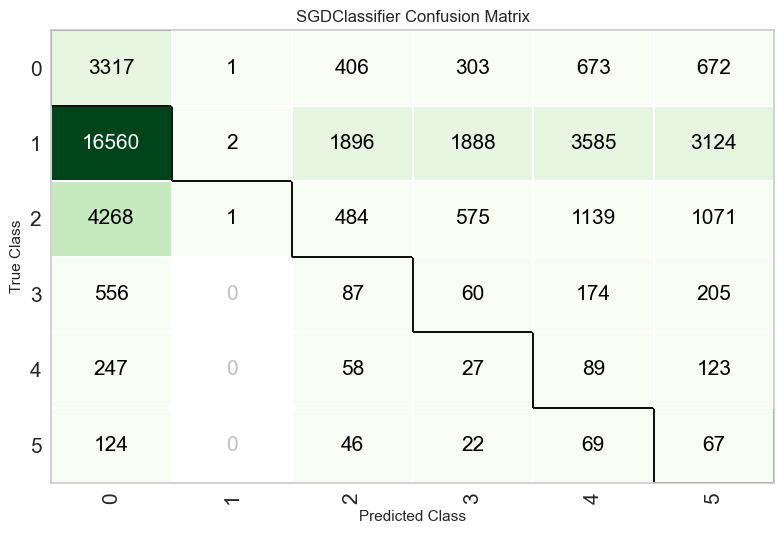

In [69]:
# plot_model(tuned_svm_clf_merged, plot = "confusion_matrix")

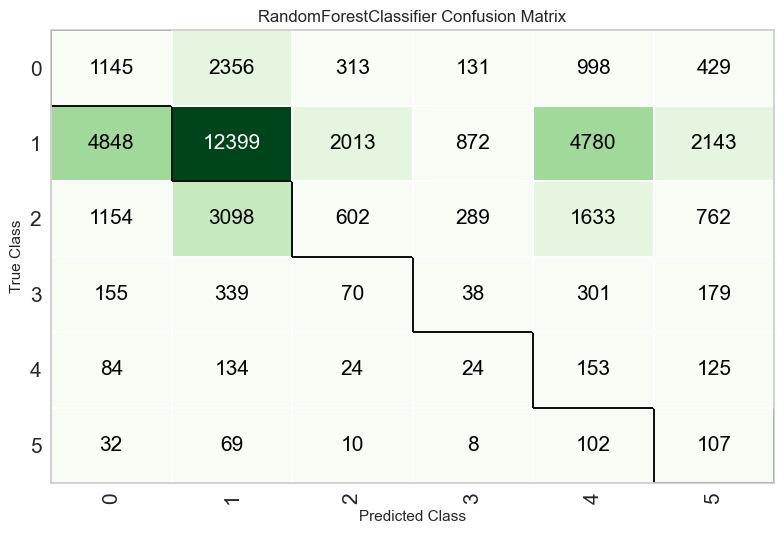

In [70]:
plot_model(tuned_rf_clf_merged, plot = "confusion_matrix")

In [36]:
dt_clf_merged = pycc.create_model('dt', fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2130,0.5449,0.2444,0.4932,0.2633,0.0227,0.0278
1,0.2231,0.5348,0.2295,0.4856,0.2728,0.0214,0.0260
2,0.2339,0.5362,0.2252,0.4919,0.2895,0.0244,0.0291
3,0.2079,0.5399,0.2265,0.4941,0.2561,0.0234,0.0288
4,0.2388,0.5392,0.2391,0.4911,0.2955,0.0279,0.0331
Mean,0.2233,0.5390,0.2330,0.4912,0.2754,0.0240,0.0290
Std,0.0118,0.0035,0.0075,0.0030,0.0150,0.0022,0.0023


In [37]:
tuned_dt_clf_merged = tune_model(dt_clf_merged, optimize='Prec.',fold=cv_strat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3055,0.5372,0.2415,0.4969,0.3696,0.0328,0.0372
1,0.3094,0.5317,0.2339,0.4914,0.3675,0.0304,0.0339
2,0.2431,0.5368,0.2254,0.4831,0.3014,0.0196,0.0231
3,0.3278,0.5392,0.2368,0.4964,0.3861,0.0353,0.0388
4,0.1926,0.5377,0.2590,0.4909,0.2232,0.0263,0.0335
Mean,0.2757,0.5365,0.2393,0.4917,0.3296,0.0289,0.0333
Std,0.0504,0.0026,0.0111,0.0050,0.0606,0.0055,0.0055


In [38]:
voting_clf_prec_blended_stratified = pycc.blend_models([tuned_dt_clf_merged, tuned_merged_lr, tuned_rf_clf_merged])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2524,0.5444,0.2464,0.4971,0.3119,0.0299,0.0355
1,0.2406,0.5454,0.2507,0.5057,0.2992,0.0310,0.0373
2,0.2483,0.5404,0.2378,0.4961,0.3079,0.0281,0.0335
3,0.2347,0.5339,0.2368,0.4889,0.2878,0.0266,0.0319
4,0.2275,0.5414,0.2058,0.4840,0.2820,0.0171,0.0205
5,0.2673,0.5371,0.2432,0.4957,0.3270,0.0321,0.0372
6,0.2166,0.5464,0.2512,0.4966,0.2675,0.0237,0.0289
7,0.2828,0.5347,0.2513,0.4873,0.3424,0.0270,0.0309
8,0.2726,0.5399,0.2644,0.4876,0.3315,0.0294,0.0339


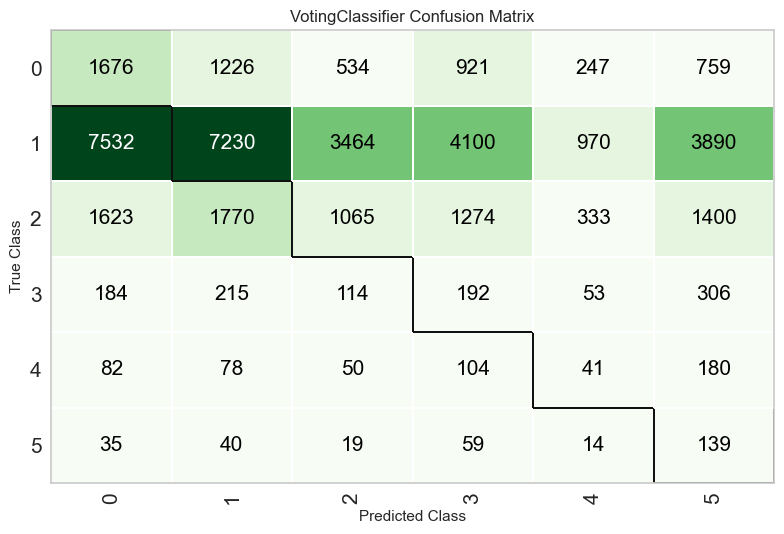

In [39]:
plot_model(voting_clf_prec_blended_stratified, plot = "confusion_matrix")

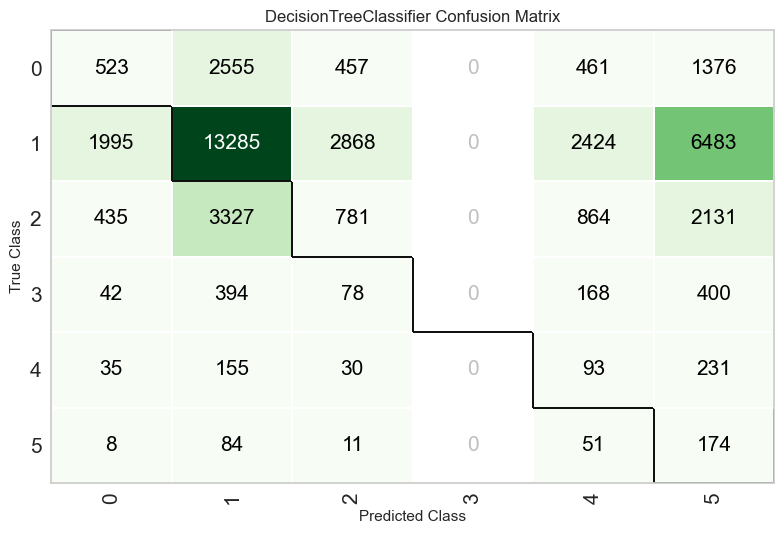

In [73]:
plot_model(tuned_dt_clf_merged, plot = "confusion_matrix")